In [73]:
import os
import fitz  # PyMuPDF
import pandas as pd
import re
import matplotlib.pyplot as plt

## Trying with pdf

In [23]:
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""

    for page in doc:
        text += page.get_text()
    doc.close()
    return text


def find_data_in_text(text):

    # Multiline regex patterns for Nom, Prénom, Date de Naissance, and Sexe
    nom_pattern = r"(?i)NOM\s*:\s*([A-Z]+)"
    prenom_pattern = r"Prénom\s*:\s*([A-Z\s]+)"

    date_naissance_pattern = r"Date de naissance\s*:\s*(\d{2}/\d{2}/\d{4})"
    sexe_pattern = r"Sexe\s*:\s*([MF])"

    # Using re.DOTALL to ensure dot matches across newlines
    nom_match = re.search(nom_pattern, text, re.DOTALL)
    prenom_match = re.search(prenom_pattern, text, re.DOTALL)
    date_naissance_match = re.search(date_naissance_pattern, text, re.DOTALL)
    sexe_match = re.search(sexe_pattern, text, re.DOTALL)

    # Extracting matched groups, handling None
    nom = nom_match.group(1).strip() if nom_match else None
    prenom = prenom_match.group(1).strip() if prenom_match else None
    date_naissance = date_naissance_match.group(
        1) if date_naissance_match else None
    sexe = sexe_match.group(1) if sexe_match else None

    return nom, prenom, date_naissance, sexe


def process_pdf_files_in_directory(directory_path):
    data = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".pdf"):
            # Extract IPP from the filename
            ipp = filename[:9]

            pdf_path = os.path.join(directory_path, filename)
            text = extract_text_from_pdf(pdf_path)

            # Extract required information using the updated function
            nom, prenom, date_naissance, sexe = find_data_in_text(text)

            # Append the extracted data including IPP
            data.append([filename, ipp, nom, prenom, date_naissance, sexe])

    return pd.DataFrame(
        data, columns=["Filename", "IPP", "Nom",
                       "Prénom", "Date de Naissance", "Sexe"]
    )

In [24]:
directory_path = "./data/data_extractMoustapha_2020:2021"
df = process_pdf_files_in_directory(directory_path)

df

,Filename,IPP,Nom,Prénom,Date de Naissance,Sexe
0,300682227_13592AE5-5BE0-4E8D-9D80-8A293331E16B...,300682227,PHILIPPE,PHILIPPE\nP,None,M
1,300675753_24DC775E-103F-4F65-A0DC-7A495F0AF034...,300675753,KEBE,ABDOURAKHMANE \n \n \nKEBE \n \n \nD,20/04/1968,M
2,300694221_AFC7C13D-868B-451E-A237-23B84F0C3C86...,300694221,JEAN,JEAN FRANCIS\nR,None,None
3,300554737_2DC418F3-6E5A-40CB-BAB7-2D243535195D...,300554737,CYRIL,CYRIL\nR,None,None
4,300650079_D2D9735F-56F8-424F-AFD7-C26667993382...,300650079,DELOBEL,SOPHIE \n \nN,04/08/1994,F
...,...,...,...,...,...,...
1049,300375539_AC10B1F6-478E-4A33-9B6D-BA3A5D0C463B...,300375539,CHRISTOPHE,CHRISTOPHE\nR,None,None
1050,300742430_D183372A-7A28-41D0-8551-F49667D72F1A...,300742430,JEAN,JEAN LOUIS\nR,None,None
1051,300576539_9198748A-AF2C-4528-A742-5A3772FB51E3...,300576539,LE,CAMILLE \n \nN,05/02/2000,F
1052,300128818_F235BDCD-B101-4140-A6A2-1C9BEDF1D39A...,300128818,FLORENCE,FLORENCE\nR,None,None


In [11]:
df["Prénom"]

0                                 PHILIPPE\nP
1       ABDOURAKHMANE \n  \n \nKEBE \n \n \nD
2                             JEAN FRANCIS\nR
3                                    CYRIL\nR
4                              SOPHIE \n  \nN
                        ...                  
1049                            CHRISTOPHE\nR
1050                            JEAN LOUIS\nR
1051                          CAMILLE \n  \nN
1052                              FLORENCE\nR
1053                          VALERIE \n  \nN
Name: Prénom, Length: 1054, dtype: object

## Going for txt files

In [12]:
def read_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return file.read()

In [13]:
def find_data_in_text(text):

    # Multiline regex patterns for Nom, Prénom, Date de Naissance, and Sexe
    nom_pattern = r"(?i)NOM\s*:\s*([A-Z]+)"
    prenom_pattern = r"Prénom\s*:\s*([A-Z\s]+)"

    date_naissance_pattern = r"Date de naissance\s*:\s*(\d{2}/\d{2}/\d{4})"
    sexe_pattern = r"Sexe\s*:\s*([MF])"

    # Using re.DOTALL to ensure dot matches across newlines
    nom_match = re.search(nom_pattern, text, re.DOTALL)
    prenom_match = re.search(prenom_pattern, text, re.DOTALL)
    date_naissance_match = re.search(date_naissance_pattern, text, re.DOTALL)
    sexe_match = re.search(sexe_pattern, text, re.DOTALL)

    # Extracting matched groups, handling None
    nom = nom_match.group(1).strip() if nom_match else None
    prenom = prenom_match.group(1).strip() if prenom_match else None
    date_naissance = date_naissance_match.group(
        1) if date_naissance_match else None
    sexe = sexe_match.group(1) if sexe_match else None

    return nom, prenom, date_naissance, sexe

In [190]:
import os
import re


def extract_prenom_before_docteur(text):
    pattern = r"Prénom\s*:\s*([A-Z\s]+)"
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        # Extract the captured group before "Docteur"
        before_docteur = match.group(1)
        first_name = before_docteur.split()[0] if before_docteur else None
        return first_name
    return None


def extract_nom(text):
    nom_pattern = r"(?i)(^Nom\s*:\s*|Nom[\s+]*usuel\s*:\s*|Nom\s*:\s*)([A-Z]+)"
    nom_match = re.search(nom_pattern, text, re.DOTALL)
    return nom_match.group(2).strip() if nom_match else None


def extract_ddn(text):
    date_naissance_pattern = (
        r"(?i)(Date[\s+]*de[\s+]*naissance\s*:\s*)(\d{2}/\d{2}/\d{4})"
    )
    date_naissance_match = re.search(date_naissance_pattern, text, re.DOTALL)
    return date_naissance_match.group(2).strip() if date_naissance_match else None


def extract_sex(text):
    sexe_pattern = r"Sexe\s*:\s*([MF])"
    sexe_match = re.search(sexe_pattern, text, re.DOTALL)
    return sexe_match.group(1) if sexe_match else None


def extract_ddprelevement(text):
    date_prelevement_pattern = (
        r"(?i)(Prélevé le \s*:\s*|Prélevé[\s+]*le\s*:\s*)(\d{2}/\d{2}/\d{4})"
    )
    date_prelevement_match = re.search(date_prelevement_pattern, text, re.DOTALL)
    return date_prelevement_match.group(2) if date_prelevement_match else None


def extract_technique(text):
    # Most found pattern
    technique_pattern = r"(2\.|II\.|I\.|2/|2°/)[\s+]*(Biopsies\s+trans[ -]*bronchiques|Biopsies\s+transbronchiques|Biospies\s+transbronchiques|BTB)[\s\S+]*?Technique[^\S\r\n]*:[^\S\r\n]*([^;]+)"
    technique_match = re.search(technique_pattern, text, re.DOTALL | re.IGNORECASE)

    if not technique_match:
        # Sometimes, there isn't the numbers, only "Biopsie" in text etc..
        fallback_technique_pattern = r"(Biopsies\s+trans[ -]*bronchiques|Biopsies\s+transbronchiques|Biospies\s+transbronchiques|BTB)[\s\S+]*?Technique\s*:\s*([^;]+)"
        fallback_match = re.search(fallback_technique_pattern, text, re.DOTALL)
        if fallback_match:
            return fallback_match.group(2).strip()

        else:
            # No mention of biopsie or lavage, just the mention of techniques two times. The BTB technique is always second.
            parts = re.split(r"(?=Technique\s*:)", text, flags=re.IGNORECASE)
            two_parts_fallback_technique_pattern = r"Technique\s*:\s*([^;]+)"
            if len(parts) > 2:
                two_parts_fallback_match = re.search(
                    two_parts_fallback_technique_pattern, parts[-1], re.DOTALL
                )
                if two_parts_fallback_match:
                    return two_parts_fallback_match.group(1).strip()

            # Else, look at any mention of technique in the document
            else:
                last_fallback_technique_pattern = r"Technique\s*:\s*([^;]+)"
                last_fallback_match = re.search(
                    last_fallback_technique_pattern, text, re.DOTALL
                )
                if last_fallback_match:
                    return last_fallback_match.group(1).strip()

    return technique_match.group(3).strip() if technique_match else None


def extract_niveaux_coupes(text):
    """
    In this function we just reuse the extract_technique patterns to extract the group after the semi-colon
    """
    # Most found pattern
    technique_pattern = r"(2\.|II\.|I\.|2/|2°/)[\s+]*(Biopsies\s+trans[ -]*bronchiques|Biopsies\s+transbronchiques|Biospies\s+transbronchiques|BTB)[\s\S+]*?Technique\s*:\s*([^;]+);\s*([^n]+)"
    technique_match = re.search(technique_pattern, text, re.DOTALL | re.IGNORECASE)

    if not technique_match:
        # Sometimes, there isn't the numbers, only "Biopsie" in text etc..
        fallback_technique_pattern = r"(Biopsies\s+trans[ -]*bronchiques|Biopsies\s+transbronchiques|Biospies\s+transbronchiques|BTB)[\s\S+]*?Technique\s*:\s*([^;]+);\s*([^n]+)"
        fallback_match = re.search(fallback_technique_pattern, text, re.DOTALL)
        if fallback_match:
            return fallback_match.group(3).strip()

        else:
            # No mention of biopsie or lavage, just the mention of techniques two times. The BTB technique is always second.
            parts = re.split(r"(?=Technique\s*:)", text, flags=re.IGNORECASE)
            two_parts_fallback_technique_pattern = r"Technique\s*:\s*([^;]+);\s*([^n]+)"
            if len(parts) > 2:
                two_parts_fallback_match = re.search(
                    two_parts_fallback_technique_pattern, parts[-1], re.DOTALL
                )
                if two_parts_fallback_match:
                    return two_parts_fallback_match.group(2).strip()

            # Else, look at any mention of technique in the document
            else:
                last_fallback_technique_pattern = r"Technique\s*:\s*([^;]+);\s*([^n]+)"
                last_fallback_match = re.search(
                    last_fallback_technique_pattern, text, re.DOTALL
                )
                if last_fallback_match:
                    return last_fallback_match.group(2).strip()

    return technique_match.group(4).strip() if technique_match else None


def extract_site(text):
    site_pattern = r"(Site[\s\xa0]*:)([\S]*[^\n]+)"
    site_match = re.search(site_pattern, text, re.DOTALL)
    return site_match.group(2).strip() if site_match else None


def extract_fragment_alveolaire(text):
    frag_alveolaire_pattern = r"(Nombre[\s\xa0]*de[\s\xa0]*fragments[\s\xa0]*alvéolaires[\s\xa0]*:)([\S]*[^\n]+)"
    frag_alveolaire_match = re.search(frag_alveolaire_pattern, text, re.DOTALL)
    return frag_alveolaire_match.group(2).strip() if frag_alveolaire_match else None


def extract_bronche_bronchiole(text):
    bronche_bronchiole_pattern = r"(Bronches\/Bronchioles[\s\xa0]*:[\s\xa0]*|Bronches[\s\xa0]*\/[\s\xa0]*Bronchioles[\s\xa0]*:[\s\xa0]*)([\S]*[^\n]+)"
    bronche_bronchiole_match = re.search(bronche_bronchiole_pattern, text, re.DOTALL)
    return (
        bronche_bronchiole_match.group(2).strip() if bronche_bronchiole_match else None
    )

def extract_infiltrat(text):
    infiltrat_pattern = r"(Infiltrat[\s\xa0]*mononucléé[\s\xa0]*péri(?:-|\s*)?vasculaire[\s\xa0]*\(A0[\s\xa0]*à[\s\xa0]*A4[\s\xa0]*\/[\s\xa0]*AX\)[\s\xa0]*:*:[\s\xa0]*|Infiltrat[\s\xa0]*mononucléé[\s\xa0]*péri(?:-|\s*)?vasculaire[\s\xa0]*\(A[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\S]*[^\n]+)"
    infiltrat__match = re.search(infiltrat_pattern, text, re.DOTALL)
    return infiltrat__match.group(2).strip() if infiltrat__match else None


def extract_bronchiolite_lymph(text):
    bronchlymph_pattern = r"(Bronchiolite[\s\xa0]*lymphocytaire[\s\xa0]*\(B0[\s\xa0]*\/[\s\xa0]*1R[\s\xa0]*\/[\s\xa0]*2R[\s\xa0]*\/[\s\xa0]*BX\)[\s\xa0]*:*:[\s\xa0]*|Bronchiolite[\s\xa0]*lymphocytaire[\s\xa0]*\(B[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\w]*)"
    bronchlymph__match = re.search(bronchlymph_pattern, text, re.DOTALL)
    return bronchlymph__match.group(2).strip() if bronchlymph__match else None


def extract_infl_lymph(text):
    infl_lymph_pattern = r"(Inflammation[\s\xa0]*lymphocytaire[\s\xa0]*bronchique[\s\xa0]*\([\s\xa0]*oui[\s\xa0]*\/[\s\xa0]*non[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\w]*)"
    infl_lymph_match = re.search(infl_lymph_pattern, text, re.DOTALL)
    return infl_lymph_match.group(2).strip() if infl_lymph_match else None

def extract_bronch_obliter(text):
    bronch_obliter_pattern = r"Bronchiolite[\s\xa0]*(oblitérante|constrictive)[\s\xa0]*:*[\s\xa0]*([\w\s]*)"
    bronch_obliter_match = re.search(bronch_obliter_pattern, text, re.DOTALL)
    return bronch_obliter_match.group(2).strip() if bronch_obliter_match else None

def extract_fibroelastose(text):  # Ajouter fibrose iterstitielle ? non
    fibroelastose_pattern = r"(Fibro(?:-|\s*)?élastose[\s\xa0]*interstitielle [\s\xa0]*\([\s\xa0]*0[\s\xa0]*ou[\s\xa0]*1[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\w]*)"
    fibroelastose_match = re.search(fibroelastose_pattern, text, re.DOTALL)
    return fibroelastose_match.group(2).strip() if fibroelastose_match else None


def extract_PNN_cloisons(text):
    pnn_pattern = r"(PNN[\s\xa0]*dans[\s\xa0]*les[\s\xa0]*cloisons[\s\xa0]*alvéolaires[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*|PNN[\s\xa0]*dans[\s\xa0]*les[\s\xa0]*cloisons[\s\xa0]*alvéolaires[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([^\n]+)"
    pnn_match = re.search(pnn_pattern, text, re.DOTALL)
    return pnn_match.group(2).strip() if pnn_match else None


def extract_cellmono(text):
    cellmono_pattern = r"(Cellules[\s\xa0]*mononucléées[\s\xa0]*dans[\s\xa0]*les[\s\xa0]*capillaires[\s\xa0]*alvéolaires[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*|Cellules[\s\xa0]*mononuclées[\s\xa0]*\(lymphocytes[\s\xa0]*ou[\s\xa0]*macrophages[\s\xa0]*dans[\s\xa0]*les[\s\xa0]*cloisons[\s\xa0]*alvéolaires\)[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\S]*[^\n]+)"
    cellmono_match = re.search(cellmono_pattern, text, re.DOTALL)
    return cellmono_match.group(2).strip() if cellmono_match else None

def extract_dilatation(text):
    dilatation_pattern = r"(Dilatation[\s\xa0]*des[\s\xa0]*capillaires[\s\xa0]*alvéolaires[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\S]*[^\n]+)"
    dilatation_match = re.search(dilatation_pattern, text, re.DOTALL)
    return dilatation_match.group(2).strip() if dilatation_match else None

def extract_oedeme(text):
    oedeme_pattern = r"((Œdème|Oedème)[\s\xa0]*des[\s\xa0]*cloisons[\s\xa0]*alvéolaires[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\S]*[^\n])"
    oedeme_match = re.search(oedeme_pattern, text, re.DOTALL)
    return oedeme_match.group(3).strip() if oedeme_match else None

def extract_hyperplasie(text):
    hyperplasie_pattern = r"(Hyperplasie[\s\xa0]*pneumocytaire[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\S]*[^\n])"
    hyperplasie_match = re.search(hyperplasie_pattern, text, re.DOTALL)
    return hyperplasie_match.group(2).strip() if hyperplasie_match else None

def extract_PNN_espace(text):
    pnn_pattern = r"(PNN[\s\xa0]*dans[\s\xa0]*les[\s\xa0]*espaces[\s\xa0]*alvéolaires[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*|PNN[\s\xa0]*dans[\s\xa0]*les[\s\xa0]*espaces[\s\xa0]*alvéolaires[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([^\n]+)"
    pnn_match = re.search(pnn_pattern, text, re.DOTALL)
    return pnn_match.group(2).strip() if pnn_match else None

def extract_thrombifib(text):
    tbf_pattern = r"(Thrombi[\s\xa0]*fibrineux[\s\xa0]*dans[\s\xa0]*les[\s\xa0]*capillaires[\s\xa0]*alvéolaires[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\S]*[^\n])"
    tbf_match = re.search(tbf_pattern, text, re.DOTALL)
    return tbf_match.group(2).strip() if tbf_match else None

def extract_debriscell(text):
    debris_pattern = r"(Débris[\s\xa0]*cellulaires[\s\xa0]*dans[\s\xa0]*les[\s\xa0]*cloisons[\s\xa0]*alvéolaires[\s\xa0]*\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\S]*[^\n])"
    debris_match = re.search(debris_pattern, text, re.DOTALL)
    return debris_match.group(2).strip() if debris_match else None

def extract_epaissfibreux(text):
    epaiss_pattern = r"(Epaississement[\s\xa0]*fibreux[\s\xa0]*des[\s\xa0]*cloisons[\s\xa0]*alvéolaires[\s\xa0]*(?:\w*)?\(0[\s\xa0]*à[\s\xa0]*\+\+\+[\s\xa0]*\)[\s\xa0]*:*:[\s\xa0]*)([\S]*[^\n])"
    epaiss_match = re.search(epaiss_pattern, text, re.DOTALL)
    return epaiss_match.group(2).strip() if epaiss_match else None

In [191]:
def process_text_files_in_directory(directory_path):
    data = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            ipp = filename[:9]
            file_path = os.path.join(directory_path, filename)
            text = read_text_file(file_path)
            nom = extract_nom(text)
            prenom = extract_prenom_before_docteur(text)
            ddn = extract_ddn(text)
            sexe = extract_sex(text)
            date_prelevement = extract_ddprelevement(text)
            technique = extract_technique(text)
            niveaux = extract_niveaux_coupes(text)
            site = extract_site(text)
            frag_alv = extract_fragment_alveolaire(text)
            bronche_bronchiole = extract_bronche_bronchiole(text)
            infiltrat = extract_infiltrat(text)
            bronch_lymph = extract_bronchiolite_lymph(text)
            infl_lymph = extract_infl_lymph(text)
            bronch_obliter = extract_bronch_obliter(text)
            fibro_elastose = extract_fibroelastose(text)
            pnn_cloisons = extract_PNN_cloisons(text)
            cellmono = extract_cellmono(text)
            dilatation = extract_dilatation(text)
            oedeme = extract_oedeme(text)
            hyperplasie = extract_hyperplasie(text)
            pnn_espaces = extract_PNN_espace(text)
            tbf = extract_thrombifib(text)
            debris = extract_debriscell(text)
            epaiss_fibreux = extract_epaissfibreux(text)
            data.append(
                [
                    filename,
                    ipp,
                    nom,
                    prenom,
                    ddn,
                    sexe,
                    date_prelevement,
                    technique,
                    niveaux,
                    site,
                    frag_alv,
                    bronche_bronchiole,
                    infiltrat,
                    bronch_lymph,
                    infl_lymph,
                    bronch_obliter,
                    fibro_elastose,
                    pnn_cloisons,
                    cellmono,
                    dilatation,
                    oedeme,
                    tbf,
                    debris,
                    epaiss_fibreux,
                    hyperplasie,
                    pnn_espaces,
                    
                    
                ]
            )

    return pd.DataFrame(
        data,
        columns=[
            "Filename",
            "IPP",
            "Nom",
            "Prénom",
            "Date de naissance",
            "Sexe",
            "Date de Prélèvement",
            "Technique",
            "Niveaux de coupes",
            "Site",
            "Nombre de fragment alvéolaire",
            "Bronches/Bronchioles",
            "Infiltrat",
            "Bronchiolite Lymphocytaire",
            "Inflammation Lymphocytaire",
            "Bronchiolite oblitérante",
            "Fibro-élastose interstitielle",
            "PNN dans les cloisons alvéolaires",
            "Cellules mononucléées",
            "Dilatation des capillaires alvéolaires",
            "Œdème des cloisons alvéolaires",
            "Thrombi fibrineux dans les capillaires alvéolaires",
            "Débris cellulaires dans les cloisons alvéolaires",
            "Epaississement fibreux des cloisons alvéolaires",
            "Hyperplasie pneumocytaire",
            "PNN dans les espaces alvéolaires",
        ],
    )


# Replace 'path_to_your_directory_with_txts' with your directory's path
directory_path = "./data/data_extractMoustapha_2020:2021"
df = process_text_files_in_directory(directory_path)

In [192]:
df

,Filename,IPP,Nom,Prénom,Date de naissance,Sexe,Date de Prélèvement,Technique,Niveaux de coupes,Site,...,Fibro-élastose interstitielle,PNN dans les cloisons alvéolaires,Cellules mononucléées,Dilatation des capillaires alvéolaires,Œdème des cloisons alvéolaires,Thrombi fibrineux dans les capillaires alvéolaires,Débris cellulaires dans les cloisons alvéolaires,Epaississement fibreux des cloisons alvéolaires,Hyperplasie pneumocytaire,PNN dans les espaces alvéolaires
0,300531886_69018907-395A-434F-9EAB-B2A9642866EA...,300531886,BOUTARD,BRUNO,04/05/1961,M,31/03/2021,HES,16,non précisé,...,0,rares,0,0,0,0,0,0,0,0
1,300701581_C8216C08-75B0-4744-AB27-3AE0A89B94C4...,300701581,CAZEAU,Jean,28/05/1958,M,24/10/2021,HES,16,LID + LM,...,0,rares,0,0,0,0,0,0,0,0
2,300676564_7278152A-DC79-4712-9856-19494341CAB2...,300676564,ROLI,JULIEN,08/06/1981,M,28/05/2020,HES,16,,...,None,None,0,0,0,None,None,None,0,0
3,300720938_6C09898C-B815-432C-96F4-9759FBAA74CB...,300720938,GUERN,LAURENCE,01/12/1970,F,13/09/2021,HES,16,LIG,...,0,rares,0,0,0,0,0,0,0,0
4,300554737_3D17E344-E143-4B89-BCF4-30D55CBB1FF4...,300554737,CHARNAY,CYRIL,06/06/1993,M,26/03/2020,HES,16,,...,None,None,0,0,0,None,None,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,300553661_4C54ECD5-BFBD-43AA-8295-39F30E33A3C8...,300553661,NUSSBAUMER,MYRTILLE,23/04/2001,F,24/11/2021,HES,16,LID + LM,...,0,0,0,0,0,0,0,0,0,0
1050,300670280_5A7A38FB-F732-4E34-898E-72D44F214041...,300670280,ARMAND,DANIEL,15/05/1956,M,03/03/2020,HES,16,LID,...,None,None,0,0,0,None,None,None,0,0
1051,300732450_DEBAB80B-F589-41AE-AA08-5F2E0D83659F...,300732450,BOYER,FABIOLA,26/02/1988,F,06/07/2021,HES,16,LID,...,None,+ à ++,0,0,0,0,0,0,+,0
1052,300409902_C9E9AFE4-1FBE-4C3E-9E2E-31B1706285AA...,300409902,BOGE,GILLES,14/10/1956,M,04/08/2020,HES,16,LM/LID,...,None,None,+focal,0,0,None,None,None,+,0


In [193]:
idx = "Epaississement fibreux des cloisons alvéolaires"

In [194]:
with pd.option_context("display.max_rows", None):
    print(df[idx].value_counts())

Epaississement fibreux des cloisons alvéolaires
0     564
+       5
#       4
-       2
00      2
Name: count, dtype: int64


In [195]:
df_na = df[df[idx].isna()]
df_na

,Filename,IPP,Nom,Prénom,Date de naissance,Sexe,Date de Prélèvement,Technique,Niveaux de coupes,Site,...,Fibro-élastose interstitielle,PNN dans les cloisons alvéolaires,Cellules mononucléées,Dilatation des capillaires alvéolaires,Œdème des cloisons alvéolaires,Thrombi fibrineux dans les capillaires alvéolaires,Débris cellulaires dans les cloisons alvéolaires,Epaississement fibreux des cloisons alvéolaires,Hyperplasie pneumocytaire,PNN dans les espaces alvéolaires
2,300676564_7278152A-DC79-4712-9856-19494341CAB2...,300676564,ROLI,JULIEN,08/06/1981,M,28/05/2020,HES,16,,...,None,None,0,0,0,None,None,None,0,0
4,300554737_3D17E344-E143-4B89-BCF4-30D55CBB1FF4...,300554737,CHARNAY,CYRIL,06/06/1993,M,26/03/2020,HES,16,,...,None,None,0,0,0,None,None,None,0,0
6,300354354_22C07AF3-B1DB-49A7-BCC5-A96901E8BA43...,300354354,SHAHEEN,HAROON,26/10/1992,M,08/06/2020,HES,16,LID LM,...,None,None,rares,0,0,None,None,None,0,0
10,300704921_851A417A-8175-4A1E-967D-55AAE548A6D0...,300704921,HATTE,YANNICK,23/10/1957,M,14/08/2020,HES,16,non précisé,...,None,None,0,0,0,None,None,None,+,++
12,300645494_8CBBA181-34A2-4F83-AE03-521982B744B0...,300645494,DELERUE,BERTRAND,10/01/1954,M,25/08/2020,HES,16,LID,...,None,None,0,0,0,None,None,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,300324632_05CC6AAC-BC10-4793-AAA9-B62EBFE0F087...,300324632,OUENDI,JENNIFER,28/11/1983,F,03/06/2020,HES,16,LM + LID,...,None,None,0,0,0,None,None,None,0,0
1039,300655966_8F82C7B8-0EFC-40A1-A1C2-1B74B18FDC3A...,300655966,PAYET,YOHAN,29/12/1993,M,29/01/2020,HES,16,LID + LM,...,None,None,0,0,0,None,None,None,0,0
1047,300700949_4C3D84A8-FA0F-41B5-B81C-8748F369EC5A...,300700949,BOULAS,ANNITA,23/01/1959,F,23/03/2020,HES,16,,...,None,None,0,0,0,None,None,None,0,0
1050,300670280_5A7A38FB-F732-4E34-898E-72D44F214041...,300670280,ARMAND,DANIEL,15/05/1956,M,03/03/2020,HES,16,LID,...,None,None,0,0,0,None,None,None,0,0


/var/folders/4l/60lgrf9s6sqbf6lcr70gbl2c0000gn/T/ipykernel_84124/2845292923.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date de Prélèvement'] = pd.to_datetime(df_na['Date de Prélèvement'])


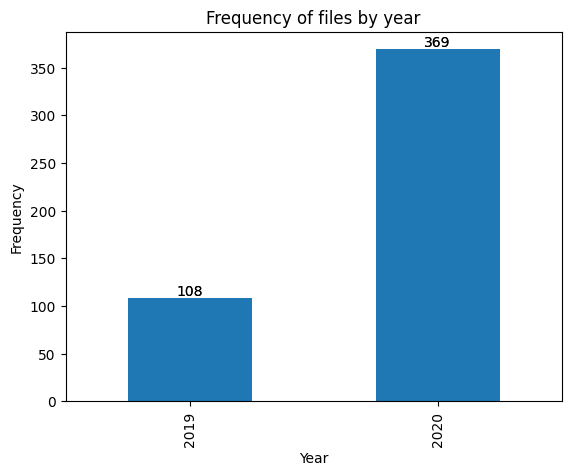

In [196]:
df1 = pd.DataFrame()
df1['Date de Prélèvement'] = pd.to_datetime(df_na['Date de Prélèvement'])

# Extract year from 'date'
df1['year'] = df1['Date de Prélèvement'].dt.year

# Plotting
df1['year'].value_counts().sort_index().plot(kind='bar')
ax = df1['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of files by year')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [197]:
# Assuming df_na and df1 as per your setup

# Filter df_na for 2021 entries using the 'year' information in df1
files_from_2021 = df_na[df1['year'] == 2021]

# List filenames from 2021
filenames_2021 = files_from_2021['Filename']

# If you want to see unique filenames and their counts
unique_filenames_2021 = filenames_2021.value_counts()

# Display the filenames and their counts
print(unique_filenames_2021)


Series([], Name: count, dtype: int64)
